## Introduction

The tutorial will introduce NetworkX, a Python library for manupulating and visualing graph data. It's a useful tool for analysing social network data, which is typically graph models. In this tutorial, we would introduce some methods and metrics to analysis a graph with NetworkX.

## Tutorial Content

In this tutorial, we will show how to analysis graphs with python NetworkX. Some basics for networkX are already introduced in the lecture. We will not review basic graph operations in this tutorial. We will focus more on some different metrics and methods to analyse a graph, typically a social network. We will firstly demonstrate these metrics and methods in a simple example graph. After that, we will use these metrics to analyse real social network data ([Facebook Ego Network data](https://snap.stanford.edu/data/egonets-Facebook.html)).

We will cover the following topics in this tutorial:
- Installing the library and create an example graph
- Network's basic properties
- Individual Importance
- Cluster and community
- Example application: Facebook Ego Network Data Analysis

## Installing the library and create an example graph

Install the current release of `networkx` with `pip`:
```
    $ pip install networkx
```
    
To upgrade to a newer release use the `--upgrade` flag:
```
    $ pip install --upgrade networkx
```

After you run the install, make sure the following import commands works for you:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Besides these libraries, we need to install community library for community analysis. You need to download the source code for this library at https://github.com/taynaud/python-louvain/. To build and install run:
```
    $ python setup.py install
```
And import it in python:

In [2]:
import community

After installing the library, we need to use NetworkX to create a simple graph for our demonstration.

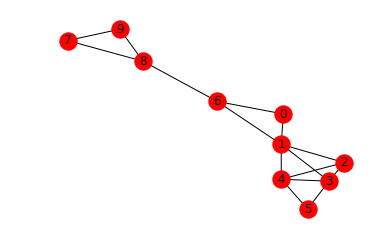

In [3]:
G = nx.Graph()
G.add_nodes_from(range(10))
G.add_edges_from([(0, 1), (0, 6), (1, 2), (2, 3), (3, 4), (1, 3), (1, 4), (2, 4),
                  (3, 5), (4, 5), (1, 6), (6, 8), (7, 8), (8, 9), (7, 9)])
plt.axis("off")
nx.draw_networkx(G, with_lables = True)
plt.show()

### Network's basic properties

Network properties can give us a "first glance" for a network. When analysing real network data, the graph might be too large to examine the network's topology by our eyes. It's a good idea to learn the basic properties of a network before deeply dive into it. The simplest metrics are **the number of nodes**, **the number of edges**, and **the average of nodes' degree**.

In [4]:
print("number of nodes: ", len(G.nodes))
print("number of edges: ", len(G.edges))
print("average edge degree: ", np.mean(G.degree))

number of nodes:  10
number of edges:  15
average edge degree:  3.75


Furthermore, we could examine the density of the graph. **Density** of a graph is simply the ratio of actual edges in the network to all possible edges in the network. NetworkX provides an one-line command to calculate the density of a graph.

In [5]:
density = nx.density(G)
print("graph density: ", density)

graph density:  0.3333333333333333


As discussed in the lecture, shortest path is a basic algorithm on graph analysing. There are many network metrics derived from shortest path lengths. Diameter is one of them. **Diameter** of a graph is the longest path among all shortest paths for all node pairs. It measures the distance from one end of the network to another.

In [6]:
diameter = nx.diameter(G)
print("diameter: ", diameter)

diameter:  5


An important concept in social network is **triadic closure**. It supposes that if two people know the same people, they are likely to know each other. If node 6 knows node 1 and node 0, then node 1 and node 0 are likely to know each other. In this example, node 1, node 0 and node 6 forms a **triangle**. These triangles are very useful when we want to find clusters and communities of people that all know each other in a group. A network measure related to triadic closure is transitivity. **Transitivity** is the ratio of all triangles over all possible triangles. A possible triangle exists when one person knows two people. To examine transitivity for a graph, we use `transitivity` method provided by NetworkX.

In [7]:
transitivity = nx.transitivity(G)
print("transitivity: ", transitivity)

transitivity:  0.6


## Individual Importance

After getting know the basic information about the network. A good next step is to find the most important nodes in a network, which means the most important people in a social network. **Degree** is the simplest and most common metrics to measure individuals' importance. We could get the most important node by getting degree for each node and sorting them.

In [8]:
sorted_degree = sorted(G.degree, key = (lambda x: x[1]), reverse = True)
print("the most important 5 nodes with their degree: ", sorted_degree[:5])

the most important 5 nodes with their degree:  [(1, 5), (3, 4), (4, 4), (2, 3), (6, 3)]


As shown above, we found that the most importance node measured by degree is node 1, which has the largest degree. However, there are some other ways to measure importance of nodes, like Eigenvector Centrality and Betweenness Centrality.

**Eigenvector Centrality** computes the centrality for a node based on the centrality of its neighbors. It measures the which node could get information from other nodes fastly.

**Betweenness Centrality** is a measure of how many shortest paths pass through a particular vertex. The more shortest paths that pass through the vertex, the more important the vertex is to the network.

NetworkX also provides one-line commands for these two centrality measurement. We could easily get centrality for nodes with the following methods:

In [9]:
eigenvector_centrality = nx.eigenvector_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

To get the most important nodes, sort them and print out to see the result.

In [10]:
sorted_eigen_centrality = sorted(eigenvector_centrality.items(), key=(lambda x:x[1]), reverse=True)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=(lambda x: x[1]), reverse=True)

print("Eigenvector Centrality: ", sorted_eigen_centrality)
print("Betweenness Centrality:", sorted_betweenness_centrality)

Eigenvector Centrality:  [(1, 0.49661642718506727), (3, 0.4601584231925293), (4, 0.4601584231925293), (2, 0.4023601936304995), (5, 0.26133807973476253), (6, 0.2220933958955739), (0, 0.20408945553030175), (8, 0.08140410879971681), (7, 0.03228503332415424), (9, 0.03228503332415424)]
Betweenness Centrality: [(1, 0.5555555555555556), (6, 0.5), (8, 0.38888888888888884), (3, 0.09722222222222221), (4, 0.09722222222222221), (0, 0.0), (2, 0.0), (5, 0.0), (7, 0.0), (9, 0.0)]


### Cluster and community

Besides the properties of the whole network and the most important nodes in a network, sometimes we are curious about communities and clusters in a social network. It's a very useful and fun analysis on social network. If you generate a community partition with your Facebook data, you could get the partition information about your friends on Facebook. You might find a community for your high school classmates, a community for your friends in college and a community for your teammates during your internship.

To analyse community on NetworkX, you need to make sure you've installed and imported community package, which is a package built upon NetworkX to provide community analysis. It provides `best_partition()` method to find a community partition for a network. It internally implementes [Louvain Modularity](https://en.wikipedia.org/wiki/Louvain_Modularity) to calculate best partitions. Louvain Modularity is used to find a good community partition to maximize the modularity of network.

In [11]:
partition = community.best_partition(G)
print("best partition:", partition)

best partition: {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0, 7: 2, 8: 2, 9: 2}


### Example application: Facebook Ego Network Data Analysis

Let's use the metrics and methods for analysing social network on some real data. We will start with [Facebook Ego Network](https://snap.stanford.edu/data/egonets-Facebook.html) data. This datasets contains the aggregated network of ten individuals' Facebook friends list. In the dataset, the nodes represent individuals on Facebook, and an edge between two users represent a friend relationship between them. In this tutorial, we use the `facebook_combined.txt` for our analysis. Before analysing it, you need to download the data from the website, and move it into the same directory as this tutorial.

To begin with, we need to read the data, and create a graph based on the edges in the file.

In [12]:
edge_file = open("facebook_combined.txt", "r")
edge_list = []
fb_network = nx.Graph()
for line in edge_file:
    x, y = map(int, line.split())
    edge_list.append((x, y))
fb_network.add_edges_from(edge_list)

After loading data, we could visualize it with drawing methods provided by NetworkX to see how the network looks like. In order to draw the network more gracefully, we need to do more manual figuration. We could change the edge color of the vertices, the size of the vertices, the size of each vertice and even change the size of the whole canvas. To achieve it, we seperate the drawing process for nodes and edges as below. If you want to further customize your final view for the network, you could dive deeper into the [document for drawing methods in NetworkX](https://networkx.github.io/documentation/networkx-1.9/reference/drawing.html).

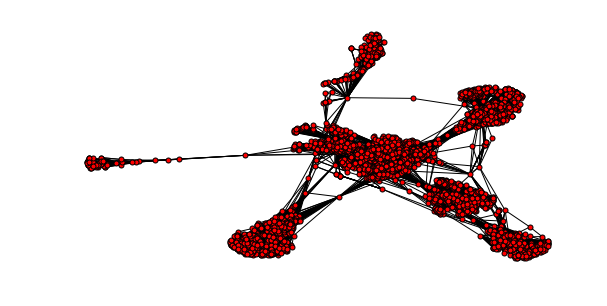

In [13]:
plt.figure(figsize=(10,5))
plt.axis("off")
pos = nx.spring_layout(fb_network)
nodes = nx.draw_networkx_nodes(fb_network, pos = pos, node_shape = ".", node_size = 100)
nodes.set_edgecolor("black")
nx.draw_networkx_edges(fb_network, pos = pos)
plt.show()

We could get basic information for this Facebook network simply with `nx.info()`.

In [14]:
print(nx.info(fb_network))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


And as we discussed above, we could get more properties of our network.

In [15]:
print("density: ", nx.density(fb_network))
print("transitivity: ", nx.transitivity(fb_network))

density:  0.010819963503439287
transitivity:  0.5191742775433075


We could easily get density and transitivity for this network. But when if you try to get the diameter of the network from `nx.diameter()` method, it would take a long time to get the result. It means that NetworkX doesn't implement an efficient algorithm for diameter calculation. However, you could try to implement an efficient diameter calculation by yourself.

Next, we could try to find some centers in the social network. If we measure centrality by eigenvector centrality, we could firstly use `nx.eigenvector_centrality()` to get the betwewenness for every node.

In [16]:
betweenness_centrality = nx.betweenness_centrality(fb_network)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=(lambda x:x[1]), reverse=True)
top10_centric = [t[0] for t in sorted_betweenness_centrality[:10]]

And try to show the most centric nodes.

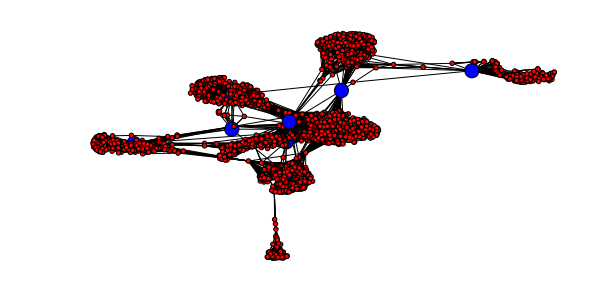

In [18]:
N = len(fb_network.nodes)
plt.figure(figsize=(10,5))
plt.axis("off")
pos = nx.spring_layout(fb_network)
node_sizes = [800 if i in top10_centric else 80 for i in fb_network.nodes()]
node_colors = ['blue' if i in top10_centric else 'red' for i in fb_network.nodes()]
nodes = nx.draw_networkx_nodes(fb_network, pos = pos, node_shape = ".",
                               node_size = node_sizes, node_color = node_colors)
nodes.set_edgecolor("black")
nx.draw_networkx_edges(fb_network, pos = pos)
plt.show()

As mentioned above, partition is also a very important measurement. Let's try to calculate partition for our Facebook Ego Network data.

In [19]:
partition = community.best_partition(fb_network)
group = [partition.get(node) for node in fb_network.nodes()]

In order to get the total number of partitions, we could look inside the `group` list, and count the number of different values in it.

In [20]:
print("number of partitions: ", len(set(group)))

number of partitions:  16


It means that in order to show the partions for the network, we need 16 colors to represent these 16 partitions. So, we create a list with 16 colors, and assign color for nodes by their partition.

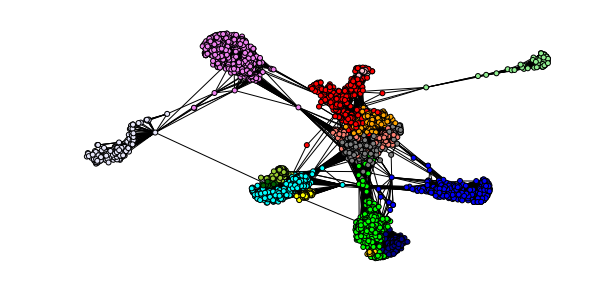

In [21]:
colors = ['blue', 'red', 'gray', 'cyan', 'lime', 'orange', 'salmon', 'violet', 'yellow', 'yellowgreen', 'pink',
         'lightgreen', 'lavender', 'darkblue', 'gold', 'darkgreen']
plt.figure(figsize=(10,5))
plt.axis("off")
pos = nx.spring_layout(fb_network)
node_colors = [colors[part] for part in group]
nodes = nx.draw_networkx_nodes(fb_network, pos = pos, node_shape = ".", node_size = 100, node_color = node_colors)
nodes.set_edgecolor("black")
nx.draw_networkx_edges(fb_network, pos = pos)
plt.show()

To dive deeper for each group, we could try to divide the whole network into small pieces, and visualize a sub-network to have a clearer view on each part of the network. NetworkX provides us a method `G.subgraph()` for us to get a subgraph of a network. Now, let's get subgraph for partition 7 and draw it out.

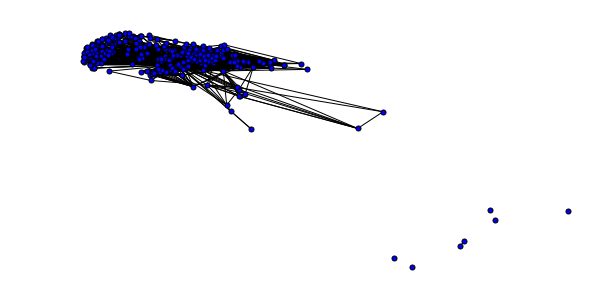

In [22]:
plt.figure(figsize=(10,5))
plt.axis("off")
pos = nx.spring_layout(fb_network)
nodes = [node for node in fb_network.nodes() if group[node] == 0]
H = fb_network.subgraph(nodes)
nodes = nx.draw_networkx_nodes(H, pos = pos, node_shape = ".", node_size = 100, node_color = "blue")
nodes.set_edgecolor("black")
nx.draw_networkx_edges(H, pos = pos)
plt.show()

And we could get to know more properties for this subgraph.

In [23]:
print(nx.info(H))
print("transitivity of partition 0: ", nx.transitivity(H))
print("density of partition 0: ", nx.density(H))

Name: 
Type: SubGraph
Number of nodes: 350
Number of edges: 2833
Average degree:  16.1886
transitivity of partition 0:  0.28586234888238193
density of partition 0:  0.04638559148587802


We could see that the density of a partition is much larger than the original network. But there are some isolation nodes in the partition. NetworkX provides us method `connected_component_subgraphs` to find out connected components for a graph.

In [24]:
components = list(nx.connected_component_subgraphs(H))

And we could walk through the list and get the largest component from these components.

In [25]:
max_size = 0
largest_component = None
for component in components:
    if len(component.nodes()) > max_size:
        max_size = len(component.nodes())
        largest_component = component

And visualize the largest component.

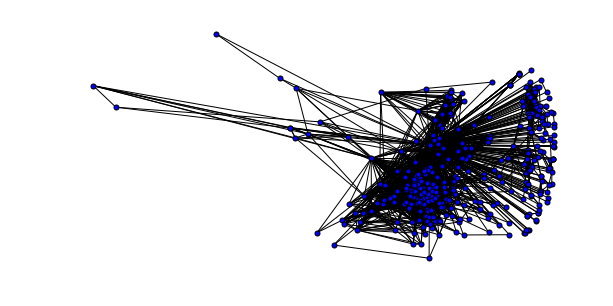

In [26]:
plt.figure(figsize=(10,5))
plt.axis("off")
pos = nx.spring_layout(fb_network)
nodes = nx.draw_networkx_nodes(largest_component, pos = pos, node_shape = ".", node_size = 100, node_color = "blue")
nodes.set_edgecolor("black")
nx.draw_networkx_edges(largest_component, pos = pos)
plt.show()

And we could look at the properties for the largest component.

In [27]:
print(nx.info(largest_component))
print("transitivity of the largest component: ", nx.transitivity(largest_component))
print("density of the largest component: ", nx.density(largest_component))
print("diameter of the largets component: ", nx.diameter(largest_component))

Name: 
Type: Graph
Number of nodes: 343
Number of edges: 2832
Average degree:  16.5131
transitivity of the largest component:  0.28586234888238193
density of the largest component:  0.04828397524423303
diameter of the largets component:  2


The density is much larger than the whole partition 0. And the diameter is 2! It means that every people in this subgraph could reach any other people in 2 steps. If you are in this social network, all other people in it are either your friend or your friend's friend!

With the methods we mentioned above, there are more interesting analysis you can do on this dataset. You could dive deeper into it after reading this tutorial, and enjoy it! :)